# Lab 3.04 - Statistical hypothesis testing

In [2]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation

## Exercise 4.1 - Navy recruits

The US Navy Recruiting Center knows from the past that recruits' heights are traditionally normally distributed with an average of 69 inches. The recruiting center wants to test whether the average height of this year's recruits exceeds 69 inches. To do this, it takes a random sample of 64 recruits from this year and records their height. The data is in the recruit.csv file.

1. Formulate the null hypothesis and the alternative hypothesis
2. Calculate the p-value
3. Draw a conclusion based on the previous step and answer the research question.

### Answers

- The p-value is 0.0017%
- There is sufficient reason to reject the H0 hypothesis. The p-value is less than 5%. It is almost impossible that the average height of the recruits would actually be 69 inches with the lengths of this sample.

The testing procedure then runs as follows:

**Step 1.** Formulate the hypotheses:

- $H_0: \mu <= 69$ (Recruits height are not higher)
- $H_1: \mu > 69$ (Recruits height are higher)

**Step 2.** Choose a significance level, e.g. $\alpha = 0.05$

**Step 3.** Determine the value of the test statistic, in this case $\overline{x} = 70.68$

**Step 4.** Determine the $p$-value and reject $H_0$ if $p < \alpha$.

In [56]:
df = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/recruten.csv',
    sep=";", decimal=",")
df



,Recruit,Height
0,1,74.5
1,2,74.0
2,3,74.6
3,4,69.8
4,5,76.0
...,...,...
59,60,74.1
60,61,71.6
61,62,66.3
62,63,67.1


In [120]:
 
alpha = 0.05 # Significance level chosen by the researcher
mu = 69 # (Hypothetical) population mean 
n = df['Height'].count() 
m_sample = df['Height'].mean()
s_sample = df['Height'].std() / np.sqrt(n)

p = stats.t.sf(m_sample, loc=mu, scale=s_sample, df=n-1)

print("p-value: %.6f" % p)
if(p < alpha):
    print("p < alpha: reject H0")
else:
    print("p > alpha: do not reject H0")  


p-value: 0.000017
p < alpha: reject H0


In [121]:
# Critical value according to the formula:
#    g = mu + stats.norm.isf(alpha) * sigma / np.sqrt(n)
# Making use of the loc/scale parameters of isf:
g = stats.t.isf(alpha, loc=mu, scale=s_sample, df=n-1)
print("Critical value g ≃ %.3f" % g)
if (m_sample < g):
    print("sample mean = %.3f < g = %.3f: do not reject H0" % (m_sample, g))
else:
    print("sample mean = %.3f > g = %.3f: reject H0" % (m_sample, g))

Critical value g ≃ 69.630
sample mean = 70.683 > g = 69.630: reject H0


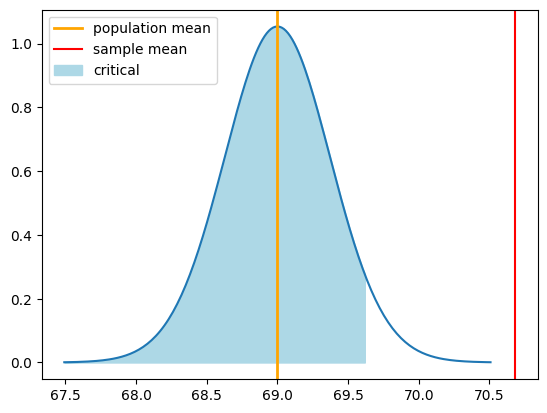

In [117]:
# Gauss-curve plot:
# X-values
dist_x = np.linspace(mu - 4 * s_sample, mu + 4 * s_sample, num=201)
# Y-values for the Gauss curve
dist_y = stats.t.pdf(dist_x, loc=mu, scale=s_sample, df=n-1)
fig, dplot = plt.subplots(1, 1)
# Plot the Gauss-curve
dplot.plot(dist_x, dist_y)
# Show the hypothetical population mean with an orange line
dplot.axvline(mu, color="orange", lw=2, label='population mean')
# Show the sample mean with a red line
dplot.axvline(m_sample, color="red", label='sample mean')
# Fill the acceptance area in light blue
dplot.fill_between(dist_x, 0, dist_y, where=dist_x <= g, color='lightblue', label='critical')
plt.legend()
plt.show()

## Exercise 4.2

The amount of rainfall on a certain island over the past 30 years has followed a normal distribution with mean 82.3 cm per year, and standard deviation 15.3. Scientists suspect that global warming has now increased the mean. A hypothesis test, of 5% level of significance is to be carried out to test the suspicion. The average rainfall on the island over the next 5 years will be used for the test.

1. Find the region of rejection for the test
2. What is the probability of making a Type I error?
3. Find the probability of making a Type II error if the mean rainfall on the island has actually increased to 105 cm per year.

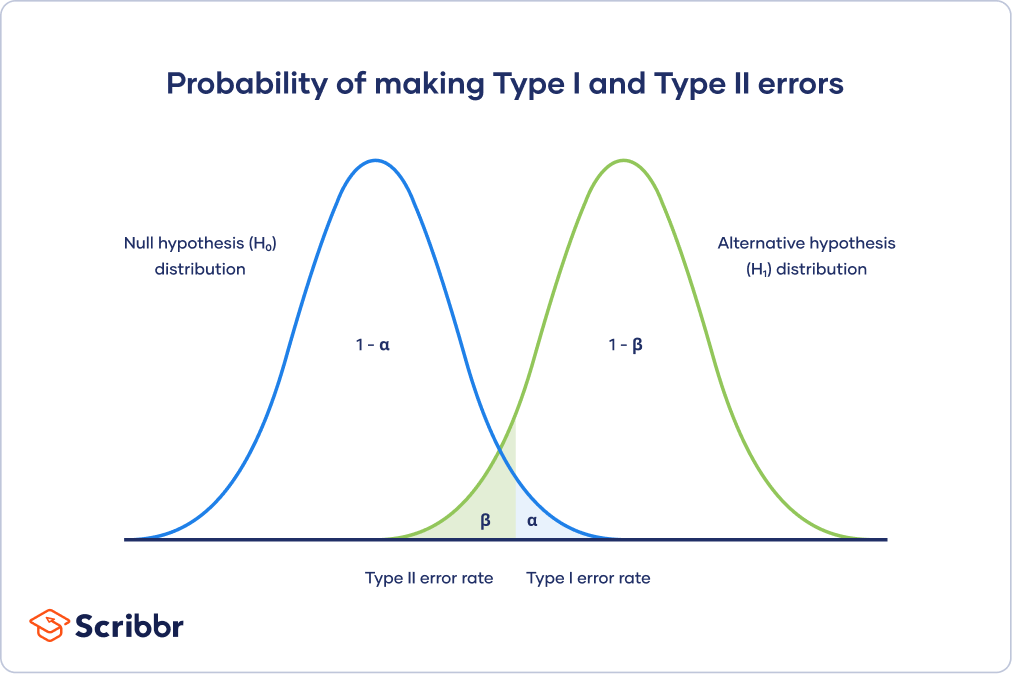


### Answers

1. Region of rejection: rainfall >= 93.555
2. Because the normal distribution is continuous, the probability of a Type I error for a 5% test is always 5%.
3. If X $\sim$ Nor(105, 15.3) => P($\bar{X}$ < 93.6) = 0.048

In [134]:
# right tailed z-test
alpha = 0.05
n = 5
mu = 82.3
sigma = 15.3 / np.sqrt(n)
 


p-value: 0.500000
p > alpha: do not reject H0


In [135]:
# Critical value according to the formula:
#    g = mu + stats.norm.isf(alpha) * sigma / np.sqrt(n)
# Making use of the loc/scale parameters of isf:
 
g = stats.t.isf(alpha, loc=mu, scale=sigma , df=n-1)

print("Critical value g ≃ %.3f" % g)
if (mu < g):
    print("sample mean = %.3f < g = %.3f: do not reject H0" % (mu, g))
else:
    print("sample mean = %.3f > g = %.3f: reject H0" % (mu, g))

Critical value g ≃ 96.887
sample mean = 82.300 < g = 96.887: do not reject H0


## Exercise 4.3

In the past, the time, in minutes for a particular minor medical procedure has been found to have mean 34.2 minutes and standard deviation 2.6. A new method is being considered in the hope that the average time would be shorter. A random sample of 50 procedures using the new method is taken and the mean time is found to be 33.5 minutes.  
Carry out a test at the 5% level of significance to see whether the mean time for the procedure has decreased.



In [141]:
mu = 34.2
n_sample = 50
sigma = 2.6 / np.sqrt(n_sample)
mu_sample = 33.5
alpha = 0.05

# < = Left tailed

g = stats.norm.isf(1-alpha, loc=mu, scale=sigma)

print("Critical value g ≃ %.3f" % g)
if (mu_sample > g):
    print("sample mean = %.3f < g = %.3f: do not reject H0" % (mu_sample, g))
else:
    print("sample mean = %.3f > g = %.3f: reject H0" % (mu_sample, g))


Critical value g ≃ 33.595
sample mean = 33.500 > g = 33.595: reject H0


In [142]:
# Determine P-value

p = stats.norm.cdf(mu_sample, loc=mu, scale=sigma) 

print("p-value: %.6f" % p)
if(p < alpha):
    print("p < alpha: reject H0")
else:
    print("p > alpha: do not reject H0")  

p-value: 0.028471
p < alpha: reject H0


### Answers

- p-value: 0.02847 => p < a: reject H0
- Critical value g ≃ 33.595 => sample mean = 33.500 < g = 33.595: reject H0

## Exercise 4.4

A certain variety of bush grows to heights which are normally distributed with mean 74.0 cm. A new fertiliser is introduced in the hope that this will increase the heights. The nursery owner records the heights of a large random sample of _n_ bushes, and calculates that $\bar{x} = 75.2$ and $s = 5.3$.  
1. She consults a friend who is a statistician as to whether or not there is evidence that the heights have increased. The friend calculates the test statistic, $z$, has a value of 1.867. Calculate the value of $n$.
2. Using this value of the test statistic, carry out the test at the 5% level of significance. 



In [150]:
# Right tailed t-test
mu = 74

alpha = 0.05
mu_sample = 75.2
s_sample = 5.3

z_test = stats.norm.isf(alpha/2)

n = np.ceil((s_sample**2 * 1.867**2) / (mu - 75.2 )**2)

print(n)


68.0


In [153]:
# Determine P-value

p = stats.norm.sf(mu_sample, loc=mu, scale=s_sample/np.sqrt(n))
 
print("p-value: %.6f" % p)
if(p < alpha):
    print("p < alpha: reject H0")
else:
    print("p > alpha: do not reject H0")  

p-value: 0.030946
p < alpha: reject H0


In [154]:
# Critical value according to the formula:
#    g = mu + stats.norm.isf(alpha) * sigma / np.sqrt(n)
# Making use of the loc/scale parameters of isf:

#g = stats.norm.isf(alpha, loc=mu, scale=s_sample / np.sqrt(n))
g = stats.norm.isf(alpha, loc=mu, scale=s_sample / np.sqrt(n))

print("Critical value g ≃ %.3f" % g)
if (mu_sample < g):
    print("sample mean = %.3f < g = %.3f: do not reject H0" % (mu_sample, g))
else:
    print("sample mean = %.3f > g = %.3f: reject H0" % (mu_sample, g))

Critical value g ≃ 75.057
sample mean = 75.200 > g = 75.057: reject H0


### Answers
1. $z = {{\bar{x} - \mu}\over{{s}\over{\sqrt{n}}}}$ => n = 68
2. p-value: 0.03095 => p < a: reject H0  
Critical value g ≃ 75.057   
sample mean = 75.200 > g = 75.057: reject H0

## Exercise 4.5 - rlanders.csv, revisited

The variable *Money* represents a gross annual salary $(×100\\)$ . We assume this variable has a mean of $\mu = 500$ with standard deviation $\sigma = 98$. If we calculate the sample mean over the entire dataset (do this yourself!), it seems to support our assumptions. But what if we looked at
men and women separately (variable *Gender*)?

First, visualise this case by plotting a kernel density estimate of the variable *Money* over the entire dataset and split up according to *Gender*. Draw a vertical line for the assumed population mean and sample means.

Use an appropriate statistical test to verify the statements below, usinge a significance level of $\alpha = 5\%$. For each statement, calculate the critical value(s) and the $p$-value.

1. The average gross annual salary of men seems higher than the average. Is it also significantly higher?
2. The average gross annual salary of women seems lower. Is it significantly lower?
3. Calculate the region of acceptance for the average gross annual salary for the sample (men and women combined). In this case we want to verify if the sample mean is significantly different from the expected value, but it can be lower or higher.



In [183]:
# Money

df = pd.read_csv('../data/rlanders.csv')

mapping_dict = {'Male' : 0, 'Female' : 1} 
df['Gender'] = df['Gender'].map(mapping_dict)

mu = 500
sigma = 98
n = df['Money'].size

mu_sample_men = df.query('Gender == 0')['Money'].mean()
n_sample_men = df.query('Gender == 0')['Money'].size
sigma_men = sigma / np.sqrt(n_sample_men)

mu_sample_wom = df.query('Gender == 1')['Money'].mean()
n_sample_wom = df.query('Gender == 1')['Money'].size
sigma_wom = sigma / np.sqrt(n_sample_wom)

alpha = 0.05

print(n)
 
# H0 = average salary men not higher than 500
# H1 = average salary men higher than 500
# = Right tailed test

# H0 = average salary women not lower than 500
# H1 = average salary women lower than 500
# = Left tailed test


250


In [176]:
p = stats.norm.sf(mu_sample_men, loc=mu, scale=sigma_men)
# p = stats.norm.sf(m_sample, loc=mu, scale=s_sample)

print("p-value: %.6f" % p)
if(p < alpha):
    print("p < alpha: reject H0")
else:
    print("p > alpha: do not reject H0")  

p-value: 0.139636
p > alpha: do not reject H0


In [203]:
p = stats.norm.cdf(mu_sample_wom, loc=mu, scale=sigma_wom)
# p = stats.norm.sf(m_sample, loc=mu, scale=s_sample)

print("p-value: %.6f" % p)
if(p < alpha):
    print("p < alpha: reject H0")
else:
    print("p > alpha: do not reject H0")  

p-value: 0.019888
p < alpha: reject H0


In [191]:
#g = stats.norm.isf(1-alpha, loc=mu, scale=s_sample / np.sqrt(n))
g_men = stats.norm.isf(alpha, loc=mu, scale=sigma_men)

print("Critical value g ≃ %.3f" % g_men)
if (mu_sample_men < g_men):
    print("sample mean = %.3f < g = %.3f: do not reject H0" % (mu_sample_men, g_men))
else:
    print("sample mean = %.3f > g = %.3f: reject H0" % (mu_sample_men, g_men))

Critical value g ≃ 511.456
sample mean = 507.535 < g = 511.456: do not reject H0


In [205]:
#g = stats.norm.isf(1-alpha, loc=mu, scale=s_sample / np.sqrt(n))
g_wom = stats.norm.isf(1 -alpha, loc=mu, scale=sigma_wom)

print("Critical value g ≃ %.3f" % g_wom)
if (mu_sample_wom > g_wom):
    print("sample mean = %.3f < g = %.3f: do not reject H0" % (mu_sample_wom, g_wom))
else:
    print("sample mean = %.3f > g = %.3f: reject H0" % (mu_sample_wom, g_wom))

Critical value g ≃ 477.646
sample mean = 472.058 > g = 477.646: reject H0


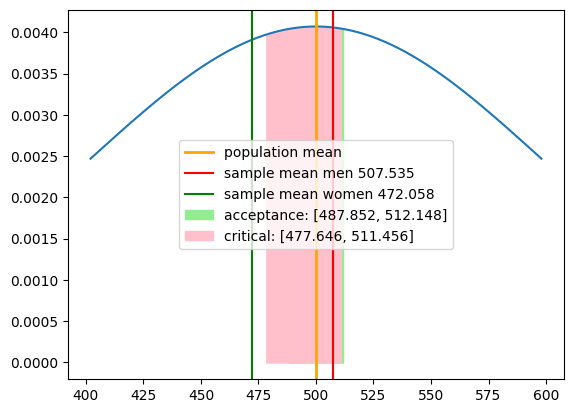

In [218]:

g1 = mu - stats.norm.isf(alpha/2) * sigma / np.sqrt(n)
g2 = mu + stats.norm.isf(alpha/2) * sigma / np.sqrt(n)

# Gauss-curve plot Men:
# X-values
dist_x = np.linspace(mu - 1 * sigma  , mu + 1 * sigma  , num=201)
# Y-values for the Gauss curve
dist_y = stats.norm.pdf(dist_x, loc=mu, scale=sigma)
fig, dplot = plt.subplots(1, 1)
# Plot the Gauss-curve
dplot.plot(dist_x, dist_y)
# Show the hypothetical population mean with an orange line
dplot.axvline(mu, color="orange", lw=2, label='population mean')
# Show the sample mean with a red line
dplot.axvline(mu_sample_men, color="red", label=f'sample mean men {mu_sample_men:.3f}')
dplot.axvline(mu_sample_wom, color="green", label=f'sample mean women {mu_sample_wom:.3f}')
# Fill the acceptance area in light blue
dplot.fill_between(dist_x, 0, dist_y, where=(dist_x >= g1) & (dist_x <= g2), color='lightgreen', 
                   label=f'acceptance: {[np.round(g1, 3), np.round(g2, 3)]}')

dplot.fill_between(dist_x, 0, dist_y, where=(dist_x >= g_wom) & (dist_x <= g_men), color='pink', 
                   label=f'critical: {[np.round(g_wom, 3), np.round(g_men, 3)]}')


plt.legend()
plt.show()

### Answers

1. Sample mean: $\overline{x} \approx 507.535$, critical value: $g \approx 511.456$, $p \approx 0.1396$. We can **not** reject the null hypothesis. The gross annual income of men in this sample is not significantly higher than expected.
2. Sample mean: $\overline{x} \approx 472.058$, critical value: $g \approx 477.646$, $p \approx 0.0199$. We can reject the null hypothesis. The gross annual income of women in this sample is significantly lower than expected.
3. The acceptance region is the interval $[487.852, 512.148]$.